## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [11]:
#откроем данные переданые Заказчиком библиотекой pandas, сохраним их в переменной data, отобразим первые 10 строк данных 
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [13]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Столбцы в таблице имеют следующие значения:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита


Краткий обзор первых 10 строк говорит о наличии некоторых проблем с данными которые нужно решить до начала обработки:
1. общий трудовой стаж клиентов принимает отрицательные значения, что является не нормальой ситуацией и возможно связано с некорректным вводом данных
2. записи уровня образования клиента в столбце education имеют разный регистр. Возможно это связано с возможностью ручного ввода данных об образовании клиента работником банкаю Лучше дать работнику банка возможность выбирать из списка
3. в столбцах days_employed и total_income имеются пропущенные значения и их необходимо каким-то образом заполнить. Одинаковое количество пропущеных значений в обоих столбцах говорит о том что для обоих столцов причины отсутствия данных могут быть одними и теми же причинами
4. Данные в столбцах education, education_id, family_status, family_status_id, income_type являются категориальными необходимо изменить их тип
5. Данный файл является относительно небольшим(2 МБ), однако в случае значительного увеличения данных в будущем для экономии экономии памяти лучше использовать тип uint8 вместо int64 для столбцов children и dob_years так как врядли возраст клиента или количество детей у будут более 255 (максимальное число детей в имеющихся данных 20). Так же данные в столбцах education и education_id (как и в столбцах family_status и family_status_id) являются дублирующими друг друга и никакой дополнительной информации не несут. По этому соответствие education столбцу education_id (family_status и family_status_id) лучше вынести в отдельные словари, а столбцы education и family_status из данных удалить
6. В данных есть люди с числом детей минус 1, в данных есть люди с возрастом 0 лет

### Вывод

### Шаг 2. Предобработка данных

### Обработка пропусков

In [14]:
#выведем строки с незаполненными данными об отсутствующем стаже 
data[data['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [15]:
#убедимся что для всех строк в которых не заполнены данные о стаже так же не заполнены данные о ежемесячном доходе 
data[data['days_employed'].isnull()]['total_income'].unique()

array([nan])

Поскольку чило незаполненных строк о стаже клиента и его ежемесячном доходе одинаковое и они всегда "ходят парой" можно сделать вывод, что отсутствие указанных данных скорее всего связано с отказом клиента от предоставления сведений о своей работе (доходах). Было бы так же интересно исследовать влияет ли предоставление клиентом информации о своей работе на возвратность кредита.

In [16]:
# создадим в данных столбец job_info в который запишем ЛОГ 1, если информация о стаже и заработке есть, ЛОГ 0 в противном случае
data['job_info'] = data['days_employed'].notna()

# рассчитаем процент незаполненных строк
print('Количество незаполненных строк: {:.1%}'.format(1 - data['job_info'].sum() / data['job_info'].count()))

Количество незаполненных строк: 10.1%


Общее количество строк с пропущеными данными составляет порядка 10% от общего числа записей, просто выкинуть их не получится так как это может привести к значительному сокращению выборки. Таким образом необходимо разработать правило заполнения пропусков. В общем случае доходы людей зависят от пола, возраста и образования

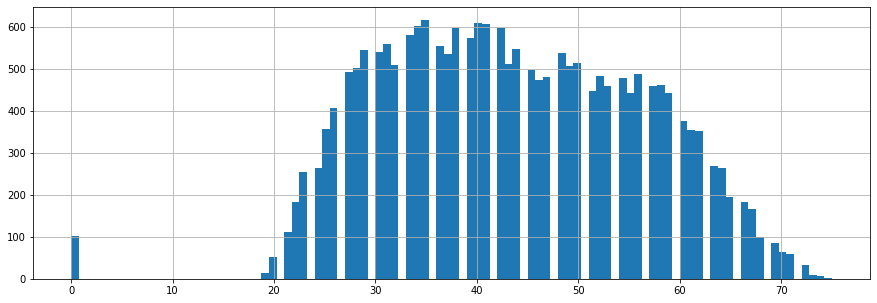

In [17]:
#import matplotlib.pyplot as plt

data['dob_years'].hist(bins = 100, figsize = (15, 5))

134155.2834794494

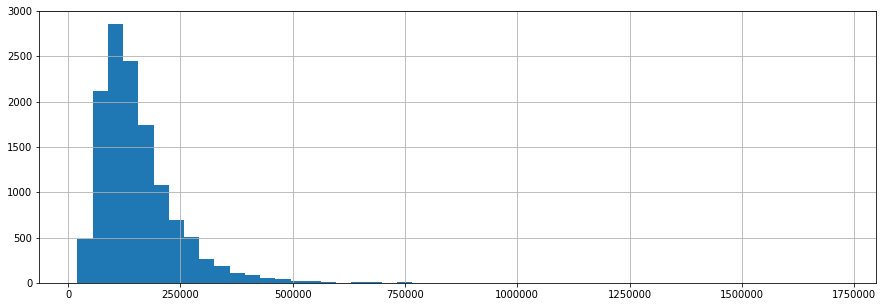

In [18]:
data[data['gender']=='F']['total_income'].hist(bins = 50, figsize = (15, 5))
data[data['gender']=='F']['total_income'].median()

167714.34371587454

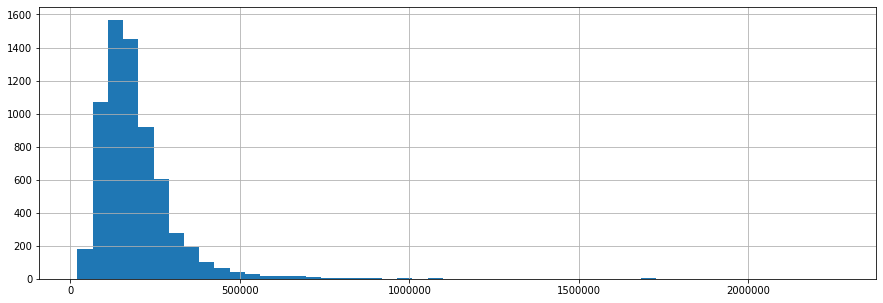

In [19]:
data[data['gender']=='M']['total_income'].hist(bins = 50, figsize = (15, 5))
data[data['gender']=='M']['total_income'].median()


### Вывод

### Замена типа данных

### Вывод

### Обработка дубликатов

In [20]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

### Вывод

### Лемматизация

### Вывод

### Категоризация данных

### Вывод

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

### Вывод

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

### Вывод

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

### Вывод

- Как разные цели кредита влияют на его возврат в срок?

### Вывод

### Шаг 4. Общий вывод

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [ ]  файл изучен;
- [ ]  определены пропущенные значения;
- [ ]  заполнены пропущенные значения;
- [ ]  есть пояснение, какие пропущенные значения обнаружены;
- [ ]  описаны возможные причины появления пропусков в данных;
- [ ]  объяснено, по какому принципу заполнены пропуски;
- [ ]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [ ]  удалены дубликаты;
- [ ]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [ ]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.